In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# First i downloaded the text file from the given link and convert it to csv files from jupyter notebook then i uploaded the csv to drive and performed further operations.

data_path = '/content/drive/My Drive/Manitoba_assignment/co2data.csv'

In [4]:
data=pd.read_csv(data_path)
data

,year,month,decimal_date,avg,interpolated,trend,num_days,Unnamed: 7
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
790,2024,1,2024.0417,422.80,422.49,27,0.70,0.26
791,2024,2,2024.1250,424.62,423.64,21,1.22,0.51
792,2024,3,2024.2083,425.38,423.91,22,0.99,0.40
793,2024,4,2024.2917,426.57,423.99,24,0.98,0.38


In [5]:

end_index = data[(data['year'] == 2010) & (data['month'] == 5)].index[0]

filtered_data = data.iloc[:end_index + 1]


print(filtered_data.head())
print(filtered_data.tail())



   year  month  decimal_date     avg  interpolated  trend  num_days  \
0  1958      3     1958.2027  315.71        314.44     -1     -9.99   
1  1958      4     1958.2877  317.45        315.16     -1     -9.99   
2  1958      5     1958.3699  317.51        314.69     -1     -9.99   
3  1958      6     1958.4548  317.27        315.15     -1     -9.99   
4  1958      7     1958.5370  315.87        315.20     -1     -9.99   

   Unnamed: 7  
0       -0.99  
1       -0.99  
2       -0.99  
3       -0.99  
4       -0.99  
     year  month  decimal_date     avg  interpolated  trend  num_days  \
622  2010      1     2010.0417  388.91        388.62     30      0.92   
623  2010      2     2010.1250  390.41        389.47     20      1.31   
624  2010      3     2010.2083  391.37        389.85     25      1.05   
625  2010      4     2010.2917  392.67        390.12     26      0.65   
626  2010      5     2010.3750  393.21        390.09     29      0.65   

     Unnamed: 7  
622        0.32  
62

In [6]:

X = filtered_data['decimal_date'].values.reshape(-1, 1)
y = filtered_data['interpolated'].values

linear_model = LinearRegression()
linear_model.fit(X, y)


filtered_data['linear_fit'] = linear_model.predict(X)


<ipython-input-6-96ddc893c254>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['linear_fit'] = linear_model.predict(X)


In [7]:

quadratic_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
quadratic_model.fit(X, y)
filtered_data['quadratic_fit'] = quadratic_model.predict(X)

<ipython-input-7-e54113f3bf82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quadratic_fit'] = quadratic_model.predict(X)


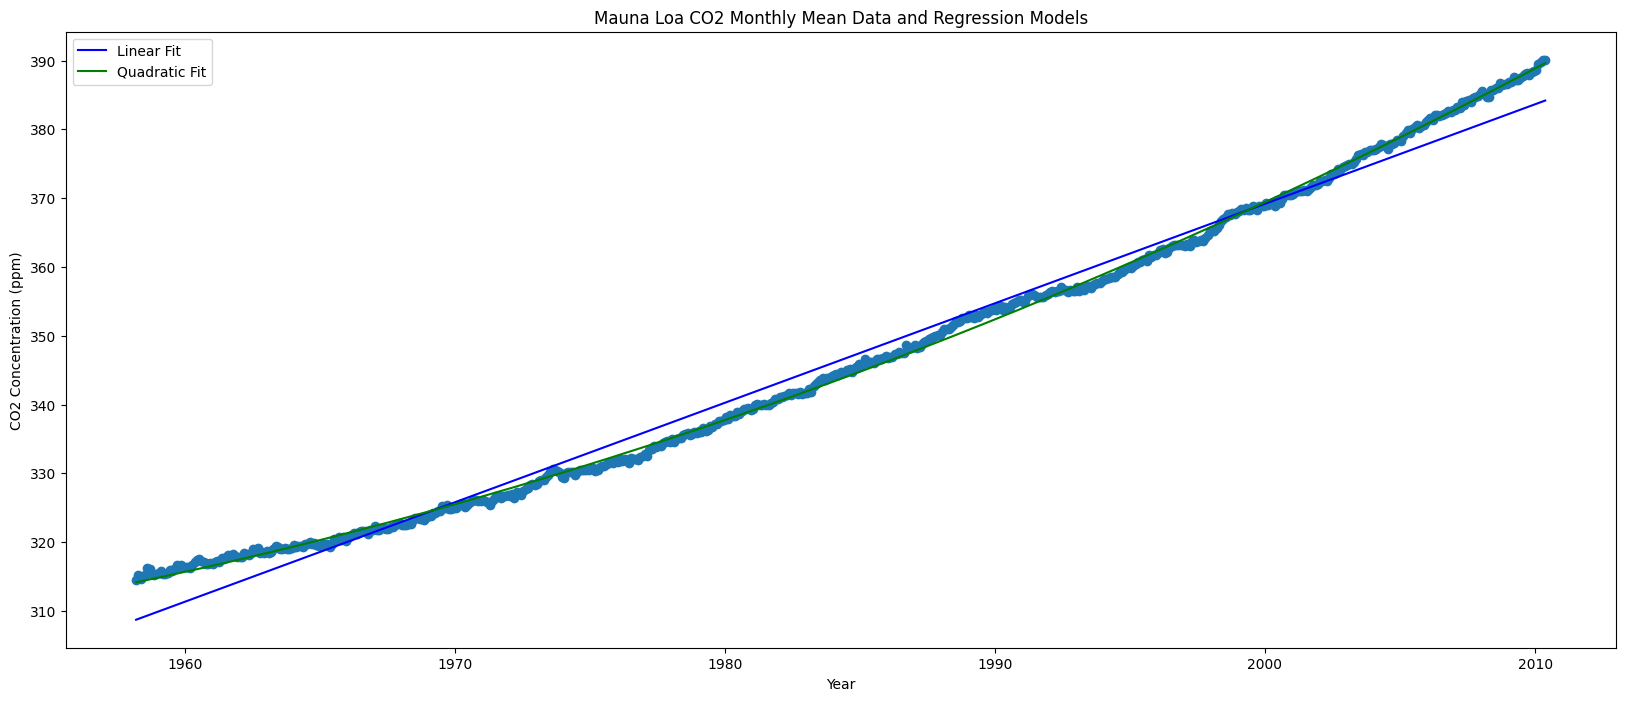

In [8]:
plt.figure(figsize=(20, 8))
plt.scatter(filtered_data['decimal_date'], filtered_data['interpolated'])
#plt.plot(filtered_data['decimal_date'], filtered_data['interpolated'], label='Original Data', color='black')
plt.plot(filtered_data['decimal_date'], filtered_data['linear_fit'], label='Linear Fit', color='blue')
plt.plot(filtered_data['decimal_date'], filtered_data['quadratic_fit'], label='Quadratic Fit', color='green')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Mauna Loa CO2 Monthly Mean Data and Regression Models')
plt.legend()
plt.show()
